In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from preprocessor import get_training_data, mem_check

In [2]:
# list devices tensorflow can see
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Preprocessing and Feature Engineering Data

In [3]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

exclude_classes = {
    "airplanes",
    "Motorbikes",
    "Faces",
    "Faces_easy",
    "watch",
    "Leopards",
}

x_train, x_test, y_train, y_test, class_names = get_training_data(
    "cnn", directory, img_height, img_width, exclude_classes
)

Balancing class accordion
Balancing class anchor
Balancing class ant
Balancing class barrel
Balancing class bass
Balancing class beaver
Balancing class binocular
Balancing class bonsai
Balancing class brain
Balancing class brontosaurus
Balancing class buddha
Balancing class butterfly
Balancing class camera
Balancing class cannon
Balancing class car_side
Balancing class ceiling_fan
Balancing class cellphone
Balancing class chair
Balancing class chandelier
Balancing class cougar_body
Balancing class cougar_face
Balancing class crab
Balancing class crayfish
Balancing class crocodile
Balancing class crocodile_head
Balancing class cup
Balancing class dalmatian
Balancing class dollar_bill
Balancing class dolphin
Balancing class dragonfly
Balancing class electric_guitar
Balancing class elephant
Balancing class emu
Balancing class euphonium
Balancing class ewer
Balancing class ferry
Balancing class flamingo
Balancing class flamingo_head
Balancing class garfield
Balancing class gerenuk
Balancin

In [4]:
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish', 'stegosaurus', 'stop_sign', 'straw

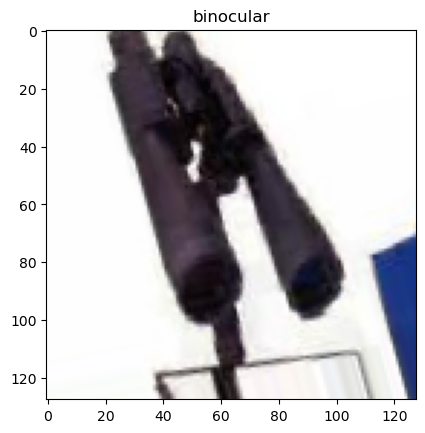

In [5]:
# shows a random augmented image - same thing in 'exploratory_data_analysis.ipynb' but added here too to ensure the data is loaded correctly
index = random.randint(0, len(x_train))
plt.imshow(x_train[index].astype(np.float32))
plt.title(class_names[y_train[index]])
plt.show()

# CNN Model

In [6]:
mem_check(globals())

x_train: 912.00 MB
x_test: 228.00 MB
y_train: 0.04 MB
y_test: 0.01 MB
class_names: 0.00 MB
exclude_classes: 0.00 MB
_iii: 0.00 MB
_i3: 0.00 MB
_i: 0.00 MB
_i5: 0.00 MB
Total memory usage: 1140.05 MB


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 512)               65028608  
                                                                 
 dropout (Dropout)           (None, 512)               0

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="max",
    restore_best_weights=True,
    verbose=1,
)

history_basic = model.fit(
    x_train, y_train, epochs=100, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
243/244 [============================>.] - ETA: 0s - loss: 11.5179 - accuracy: 0.0175
Epoch 1: val_accuracy improved from -inf to 0.00874, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 11s 40ms/step - loss: 11.5125 - accuracy: 0.0175 - val_loss: 4.5570 - val_accuracy: 0.0087
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 4.4946 - accuracy: 0.0351
Epoch 2: val_accuracy improved from 0.00874 to 0.01799, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 8s 35ms/step - loss: 4.4948 - accuracy: 0.0351 - val_loss: 4.5621 - val_accuracy: 0.0180
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 4.4355 - accuracy: 0.0430
Epoch 3: val_accuracy improved from 0.01799 to 0.03751, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 9s 35ms/step - loss: 4.4352 - accuracy: 0.0430 - val_loss: 4.5292 - val_accuracy: 0.0375
Epoch 4

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 1s 8ms/step - loss: 5.5285 - accuracy: 0.1258
Test accuracy: 0.12582236528396606


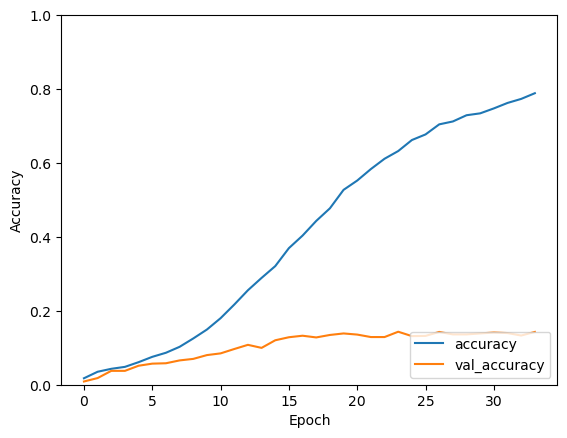

In [11]:
# plot training history
plt.plot(history_basic.history['accuracy'], label='accuracy')
plt.plot(history_basic.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Here, the accuracy increasing drastically whilst the evaluation accuracy plateaus indicates overfitting

# Use transfer learning to improve results

In [12]:
mem_check(globals())

x_train: 912.00 MB
x_test: 228.00 MB
y_train: 0.04 MB
y_test: 0.01 MB
class_names: 0.00 MB
_iii: 0.00 MB
_i9: 0.00 MB
_i7: 0.00 MB
exclude_classes: 0.00 MB
_i3: 0.00 MB
Total memory usage: 1140.05 MB


In [13]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

history_transfer1 = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
244/244 [==============================] - ETA: 0s - loss: 4.1703 - accuracy: 0.0723
Epoch 1: val_accuracy improved from -inf to 0.27801, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 17s 58ms/step - loss: 4.1703 - accuracy: 0.0723 - val_loss: 3.4665 - val_accuracy: 0.2780
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 3.4718 - accuracy: 0.1637
Epoch 2: val_accuracy improved from 0.27801 to 0.38181, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 11s 46ms/step - loss: 3.4724 - accuracy: 0.1636 - val_loss: 2.8111 - val_accuracy: 0.3818
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 3.1032 - accuracy: 0.2115
Epoch 3: val_accuracy improved from 0.38181 to 0.42806, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 11s 46ms/step - loss: 3.1035 - accuracy: 0.

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 41ms/step - loss: 1.5387 - accuracy: 0.5933
Test accuracy: 0.5933387875556946


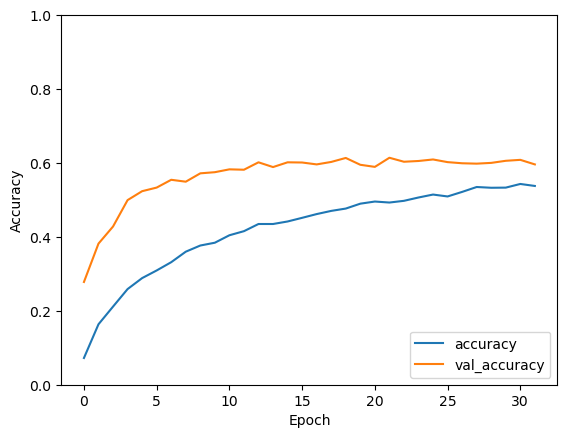

In [16]:
# plot training history
plt.plot(history_transfer1.history['accuracy'], label='accuracy')
plt.plot(history_transfer1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

As we can see above, using the pretrained model has helped stop the overfitting, but our evaluation accuracy is plateauing at around 60%. Let's improve that by adjusting the layers.

In [17]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-8:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history_transfer2 = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
243/244 [============================>.] - ETA: 0s - loss: 4.9878 - accuracy: 0.0913
Epoch 1: val_accuracy improved from -inf to 0.26310, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 14s 52ms/step - loss: 4.9869 - accuracy: 0.0915 - val_loss: 3.5336 - val_accuracy: 0.2631
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 3.2920 - accuracy: 0.2807
Epoch 2: val_accuracy improved from 0.26310 to 0.44604, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 11s 46ms/step - loss: 3.2921 - accuracy: 0.2806 - val_loss: 2.6892 - val_accuracy: 0.4460
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 2.7521 - accuracy: 0.3825
Epoch 3: val_accuracy improved from 0.44604 to 0.50668, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 11s 46ms/step - loss: 2.7519 - accuracy: 0.

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 37ms/step - loss: 1.4464 - accuracy: 0.6941
Test accuracy: 0.6940789222717285


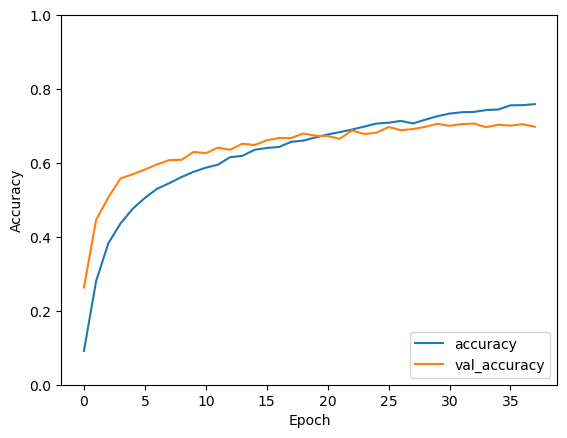

In [21]:
# plot training history
plt.plot(history_transfer2.history['accuracy'], label='accuracy')
plt.plot(history_transfer2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

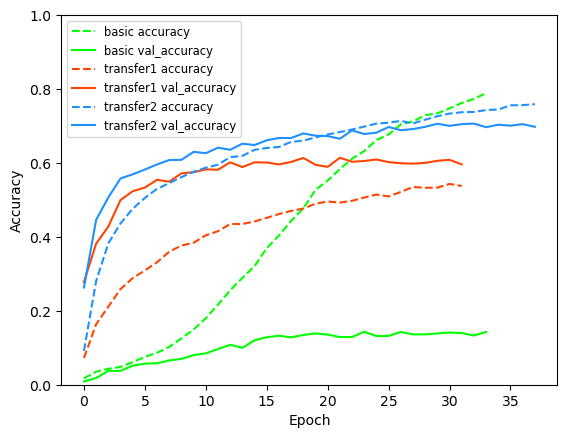

In [23]:
plt.plot(history_basic.history['accuracy'], label='basic accuracy', color='#00FF00', linestyle='dashed')
plt.plot(history_basic.history['val_accuracy'], label = 'basic val_accuracy', color='#00FF00')
plt.plot(history_transfer1.history['accuracy'], label='transfer1 accuracy', color='#FF4500', linestyle='dashed')
plt.plot(history_transfer1.history['val_accuracy'], label = 'transfer1 val_accuracy', color='#FF4500')
plt.plot(history_transfer2.history['accuracy'], label='transfer2 accuracy', color='#1E90FF', linestyle='dashed')
plt.plot(history_transfer2.history['val_accuracy'], label = 'transfer2 val_accuracy', color='#1E90FF')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [24]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

76/76 [==============================] - 3s 37ms/step


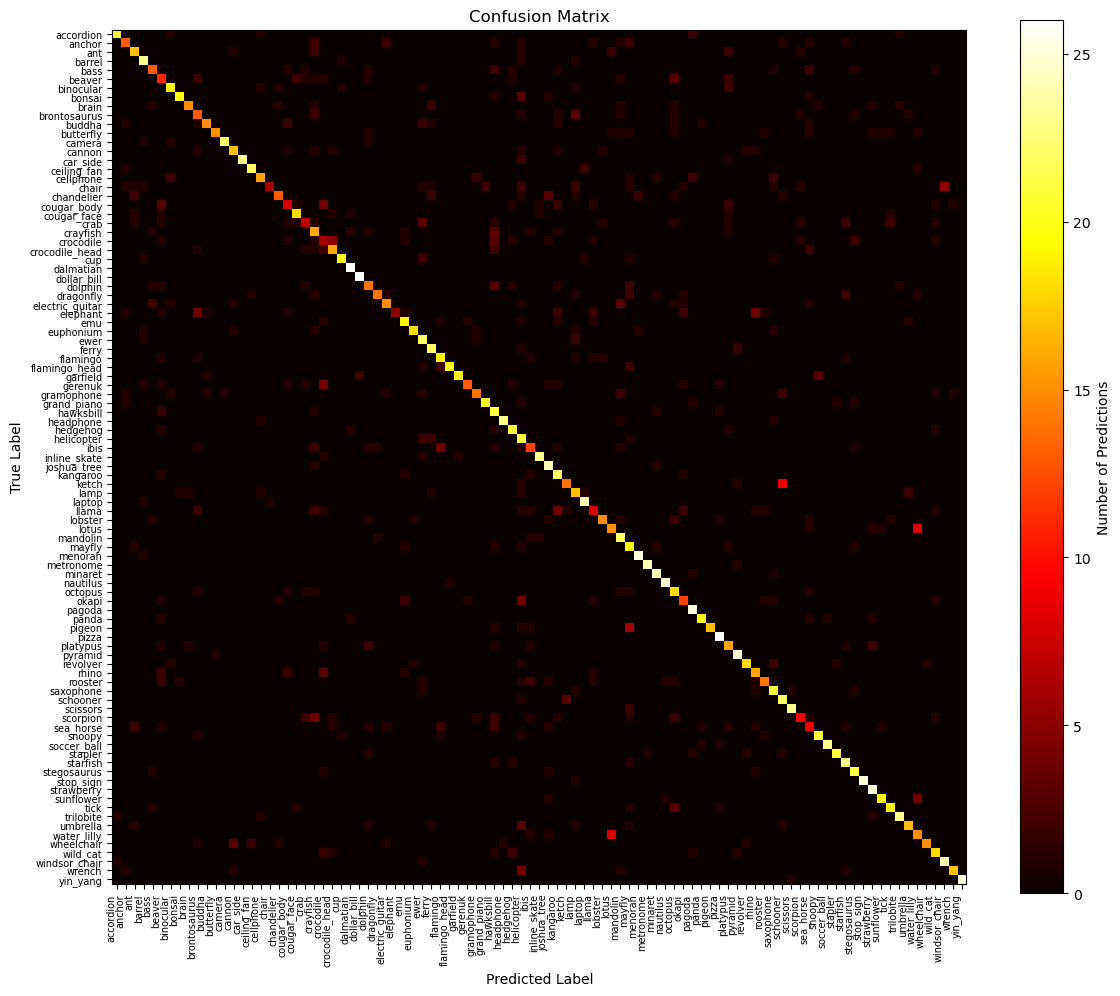

In [25]:
plt.figure(figsize=(12, 10))
plt.imshow(confusion_matrix, cmap='hot', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar(label='Number of Predictions')

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90, ha='right', fontsize=7)
plt.yticks(tick_marks, class_names, fontsize=7)

plt.tight_layout()
plt.show()